Root Mean Squared Error: 793.3230064562335
R^2 Score: 0.9806617978215239


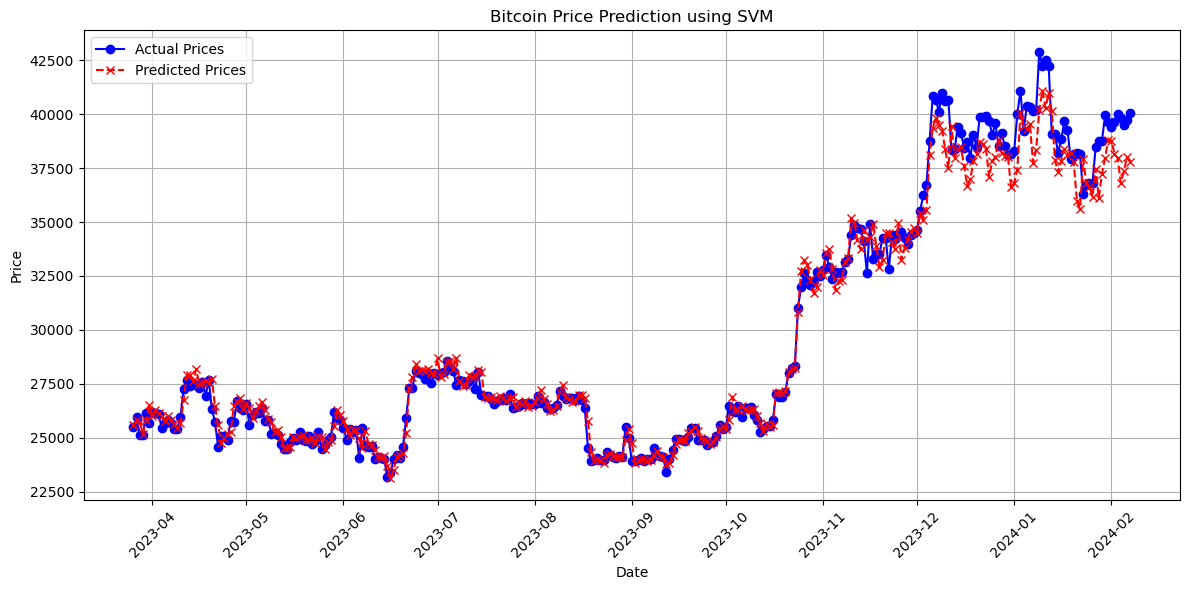

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Bitcoin price data
bitcoin_prices = pd.read_csv('dataset/BitcoinData.csv', delimiter=';')

# Convert the 'timestamp' column to datetime format and use it as the dataframe index
bitcoin_prices['timestamp'] = pd.to_datetime(bitcoin_prices['timestamp'])
bitcoin_prices.set_index('timestamp', inplace=True)

# Ensure the data is ordered by date
bitcoin_prices.sort_index(inplace=True)

# Define features and the target variable for the prediction model
features = bitcoin_prices[['open', 'high', 'low', 'volume']]  # Predictor variables
target = bitcoin_prices['close']  # Prediction target

# Split the data into training and testing sets with an 80/20 split
train_size = int(len(features) * 0.8)
features_train, features_test = features.iloc[:train_size], features.iloc[train_size:]
target_train, target_test = target.iloc[:train_size], target.iloc[train_size:]

# Normalize the feature data
feature_normalizer = StandardScaler()
features_train_normalized = feature_normalizer.fit_transform(features_train)
features_test_normalized = feature_normalizer.transform(features_test)

# Create and train the Support Vector Regression model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(features_train_normalized, target_train)

# Predict target values using the trained model
predictions = svr_model.predict(features_test_normalized)

# Calculate performance metrics of the model
mean_squared_err = mean_squared_error(target_test, predictions)
root_mean_squared_err = np.sqrt(mean_squared_err)
r_squared_value = r2_score(target_test, predictions)

print(f'Root Mean Squared Error: {root_mean_squared_err}')
print(f'R^2 Score: {r_squared_value}')

# Visualize actual vs. predicted Bitcoin prices
plt.figure(figsize=(12, 6))
plt.plot(target_test.index, target_test, label='Actual Prices', color='blue', marker='o')
plt.plot(target_test.index, predictions, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.title('Bitcoin Price Prediction using SVM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
